# Manejo de datos básico

In [1]:
# Uso de funciones
# Partes de módulos completas
# Importa algunos cálculos estadísticos básicos desde la librería 'statistics'
from statistics import mean, median, mode, stdev

# Un ejemplo simple para calcular la media
test_scores = [40, 85, 92, 76, 94, 99, 78]

# Qué tal si ahora utilizamos nuestra base de datos y calculamos, sobre el campo año la misma media
# Importamos el módulo numpy
import numpy as np

# Importar la función completa 'csv' para tratamiento de archivos
import csv

# Abre el archivo de lectura
file = open(r'./netflix_titles.csv')

# Lee el archivo en el objeto csvreader
csvreader = csv.reader(file)

# Extrae los datos a una lista
rows = []
for row in csvreader: rows.append(row)

# Generamos el objeto movies con todas las filas de la lista
movies = np.array(rows)

# Vamos a generar un array solamente de los años, para trabajar sobre él
release_year = movies[1:, 7]

# Transformación del array en números
release_year_int = [int(numeric_string) for numeric_string in release_year]

In [2]:
# Cálculo de la media y la desviación estándar del arreglo
mean_year = mean(release_year_int)
stdev_year = stdev(release_year_int)
min_year = min(release_year_int)
max_year = max(release_year_int)

# Primer reporte estadístico de los datos
print('En promedio, el año en el que se generaron las películas del archivo es el', int(mean_year))
print('Además, la desviación estándar de los datos nos muestra que se tienen', int(stdev_year), ' años de desviación estándar.')
print('El primer año que se muestra en los datos es', int(min_year))
print('El último año que se incluye en los datos es', int(max_year))

En promedio, el año en el que se generaron las películas del archivo es el 2014
Además, la desviación estándar de los datos nos muestra que se tienen 8  años de desviación estándar.
El primer año que se muestra en los datos es 1925
El último año que se incluye en los datos es 2021


In [4]:
# Ahora bien, estos datos nos sirven para entender los años en los que las películas se mostraron al público
# No sé si será tan relevante saber el año promedio, pero sí saber cómo hacerlo

# Ahora se trabajará con el campo duración
# Asignamos al array duration las duraciones de todas las películas
# Las duraciones pueden estar en 'min=minutos', o en 'season' o 'seasons' = temporadas
duration = movies[1:, 9]
duration[0:10]

array(['90 min', '2 Seasons', '1 Season', '1 Season', '2 Seasons',
       '1 Season', '91 min', '125 min', '9 Seasons', '104 min'],
      dtype='<U771')

In [5]:
# Cómo obtener la duración promedio de las películas
# Una definición inicial, es que vamos a obtener nada más información de películas, no series
# Esto quiere decir que SOLAMENTE nos vamos a enfocar en las películas que terminen en 'min'
# Obtiene las primeras 10 películas que vienen en minutos
movies[np.char.endswith(movies, ' min')][:9]

array(['90 min', '91 min', '125 min', '104 min', '127 min', '91 min',
       '67 min', '94 min', '161 min'], dtype='<U771')

In [6]:
# Generar un array de las duraciones en minutos
duration_min = (duration[np.char.endswith(duration, 'min')])
duration_min

array(['90 min', '91 min', '125 min', ..., '88 min', '88 min', '111 min'],
      dtype='<U771')

In [7]:
# Una vez que tenemos las películas terminadas en min, se convierte el registro, ej, '90 min' a un número = 90
# Eso se hace utilizando la función 'strip' de la librería numpy (np.char)

# Elimina la terminación ' min'
duration_min_end = np.char.strip(duration_min, ' min')

# Transforma el array a números
duration_min_int = [int(numeric_string) for numeric_string in duration_min_end]

In [8]:
# Muestra las primeras 10 películas con sus duraciones
duration_min_int[:9]

[90, 91, 125, 104, 127, 91, 67, 94, 161]

In [9]:
# Así, se obtiene un nuevo reporte estadístico, mucho más interesante
# Enfocado en las duraciones de las películas

mean_movie = mean(duration_min_int)
stdev_movie = stdev(duration_min_int)
min_movie = min(duration_min_int)
max_movie = max(duration_min_int)

# Primer reporte estadístico de los datos
print('En promedio, la duración de las películas del conjunto de datos es', int(mean_movie), 'minutos.')
print('Además, la desviación estándar de los datos nos muestra que se tienen', int(stdev_movie), 'minutos.')
print('La película con menor duración es de', int(min_movie), 'minutos.')
print('La película con mayor duración es de', int(max_movie), 'minutos.')

En promedio, la duración de las películas del conjunto de datos es 99 minutos.
Además, la desviación estándar de los datos nos muestra que se tienen 28 minutos.
La película con menor duración es de 3 minutos.
La película con mayor duración es de 312 minutos.


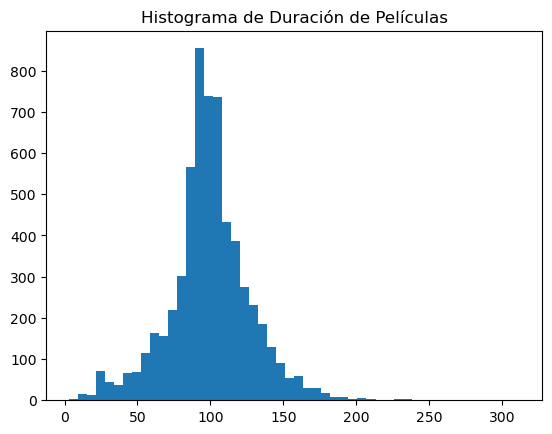

In [10]:
# Nuevos gráficos
import matplotlib.pyplot as plt
plt.title('Histograma de Duración de Películas')
plt.hist(duration_min_int, bins=50)
plt.show()

In [12]:
# Qué películas corresponden a la más corta y más larga?
# Tip: buscar por "3 min" y "312 min" en la base de datos original (no la de duraciones) - movies

# Filto para la película de 3 min
filter_arr = (duration == '3 min')
print(filter_arr)

dur_array3min = movies[1:][filter_arr]
print(dur_array3min)

[False False False ... False False False]
[['s3778' 'Movie' 'Silent' 'Limbert Fabian, Brandon Oldenburg' ''
  'United States' 'June 4, 2019' '2014' 'TV-Y' '3 min'
  'Children & Family Movies, Sci-Fi & Fantasy'
  '"Silent" is an animated short film created by Academy Award® winning Moonbot Studios. It celebrates how storytellers, inventors, and technology work together to create cinema magic.']]


In [13]:
# Filtro para la película de 312 min
filter_arr = (duration == '312 min')
print(filter_arr)

dur_array312min = movies[1:][filter_arr]
print(dur_array312min)

[False False False ... False False False]
[['s4254' 'Movie' 'Black Mirror: Bandersnatch' ''
  'Fionn Whitehead, Will Poulter, Craig Parkinson, Alice Lowe, Asim Chaudhry'
  'United States' 'December 28, 2018' '2018' 'TV-MA' '312 min'
  'Dramas, International Movies, Sci-Fi & Fantasy'
  'In 1984, a young programmer begins to question reality as he adapts a dark fantasy novel into a video game. A mind-bending tale with multiple endings.']]


In [15]:
# Para ver el nombre solamente de la película se puede referir al campo de esta forma
# Los índices vienen del primer campo 's3778', que es un índice numérico
print(movies[3778][2])
print(movies[4254][2])

Silent
Black Mirror: Bandersnatch
